#### Loan Status Prediciton
##### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### Problem Statement

- In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. (wikipedia)

#### Data Collection

- The Dataset is collected from https://raw.githubusercontent.com/HARSHALKUMRE/Main-Branching/main/LoanData.csv
- The data consists of 13 column and 614 rows.

##### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'data/LoanData.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [13]:
df.drop(columns=['Loan_ID'], inplace=True)

#### Exploring Data

In [14]:
# define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# print columns
print(
    "We have {} numerical features : {}".format(len(numerical_features), numerical_features)
)
print(
    "\nWe have {} categorical features : {}".format(
        len(categorical_features), categorical_features
    )
)

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 7 categorical features : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [15]:
# percentage of each category in categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("---------------------------")

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64
---------------------------
Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64
---------------------------
Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64
---------------------------
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64
---------------------------
Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64
---------------------------
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64
---------------------------
Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64
---------------------------


##### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

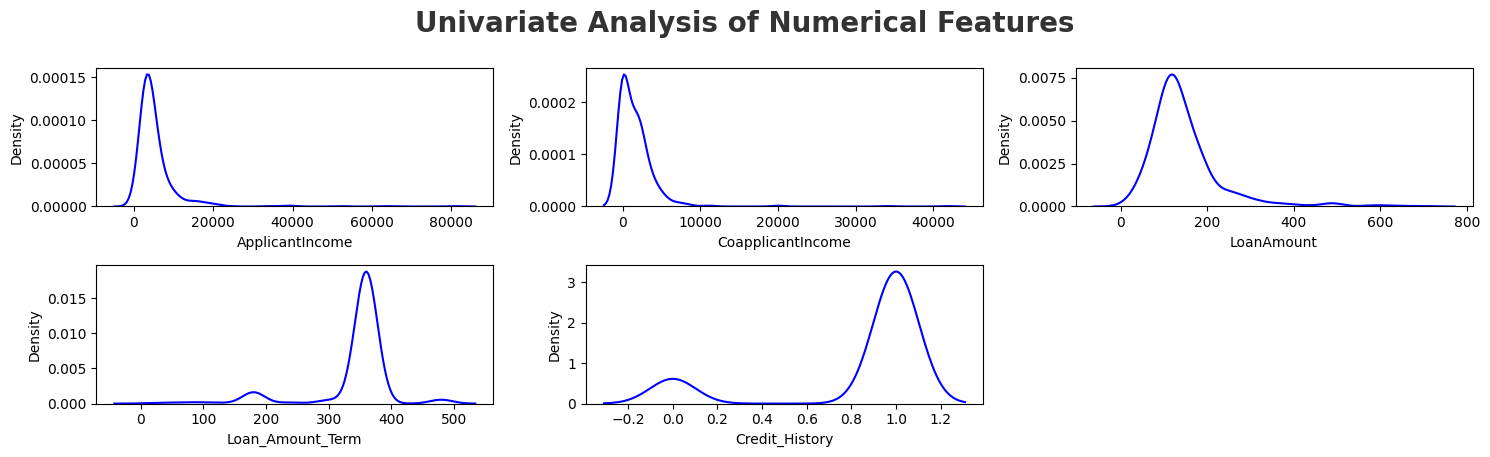

In [16]:
# Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle(
    "Univariate Analysis of Numerical Features",
    fontsize=20,
    fontweight="bold",
    alpha=0.8,
    y=1.0,
)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], color="blue")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

ValueError: num must be an integer with 1 <= num <= 6, not 7

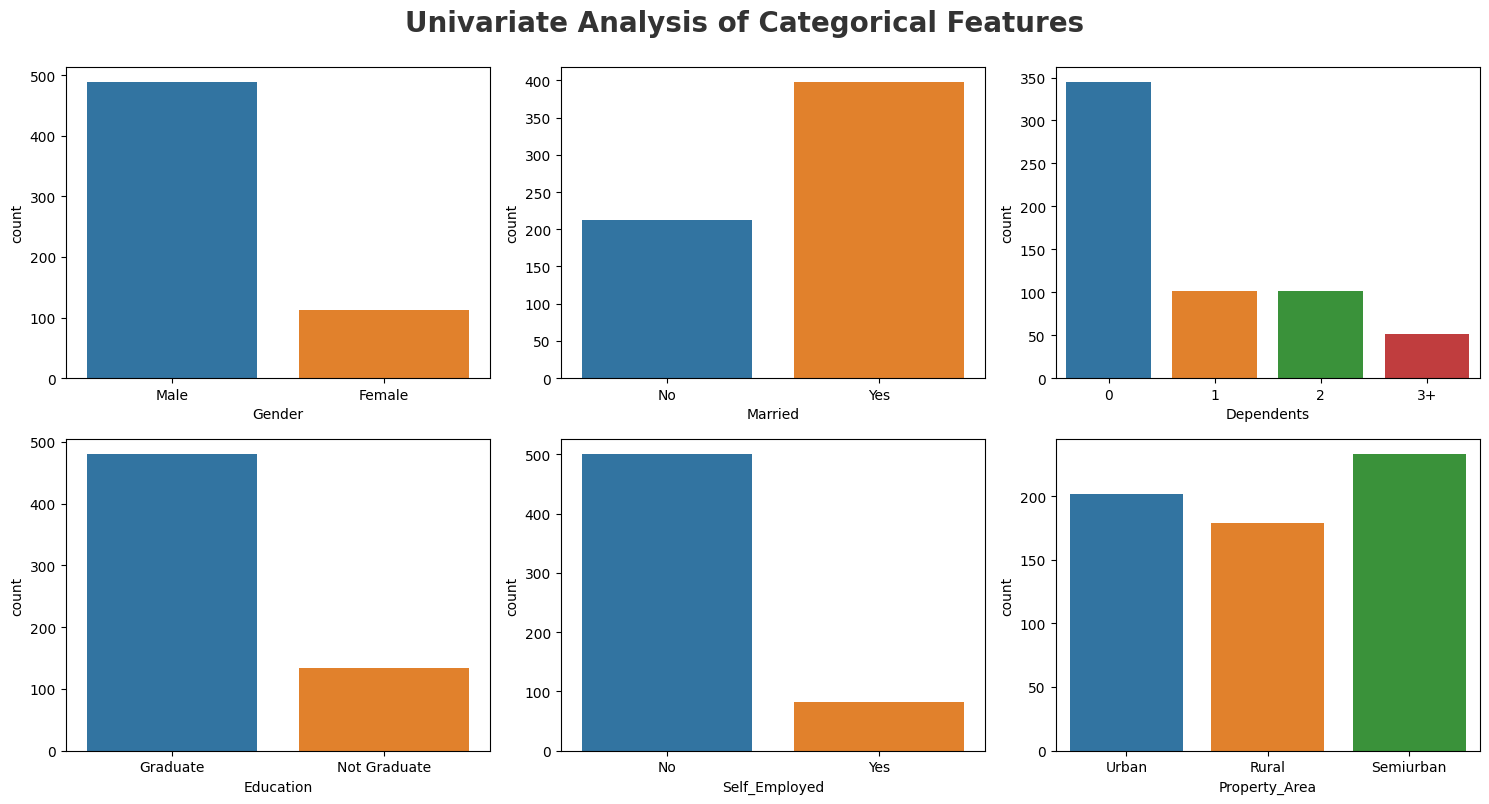

In [17]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle(
    "Univariate Analysis of Categorical Features",
    fontsize=20,
    fontweight="bold",
    alpha=0.8,
    y=1.0,
)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

##### Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

In [18]:
discrete_features = [
    feature
    for feature in numerical_features
    if (len(df[feature].unique()) <= 25 and len(df[feature].unique()) > 3)
]

continuous_features = [
    feature for feature in numerical_features if len(df[feature].unique()) > 25
]

encoded_categorical = [
    feature for feature in numerical_features if len(df[feature].unique()) <= 3
]

print(
    "We have {} discrete features : {}".format(
        len(discrete_features), discrete_features
    )
)
print(
    "\nWe have {} continuous_features : {}".format(
        len(continuous_features), continuous_features
    )
)
print(
    "\nWe have {} encoded_categorical : {}".format(
        len(encoded_categorical), encoded_categorical
    )
)

We have 1 discrete features : ['Loan_Amount_Term']

We have 3 continuous_features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

We have 1 encoded_categorical : ['Credit_History']


In [19]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']


##### Check Multicollinearity in Numerical features

In [20]:
df[(list(df[continuous_features])[0:])].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


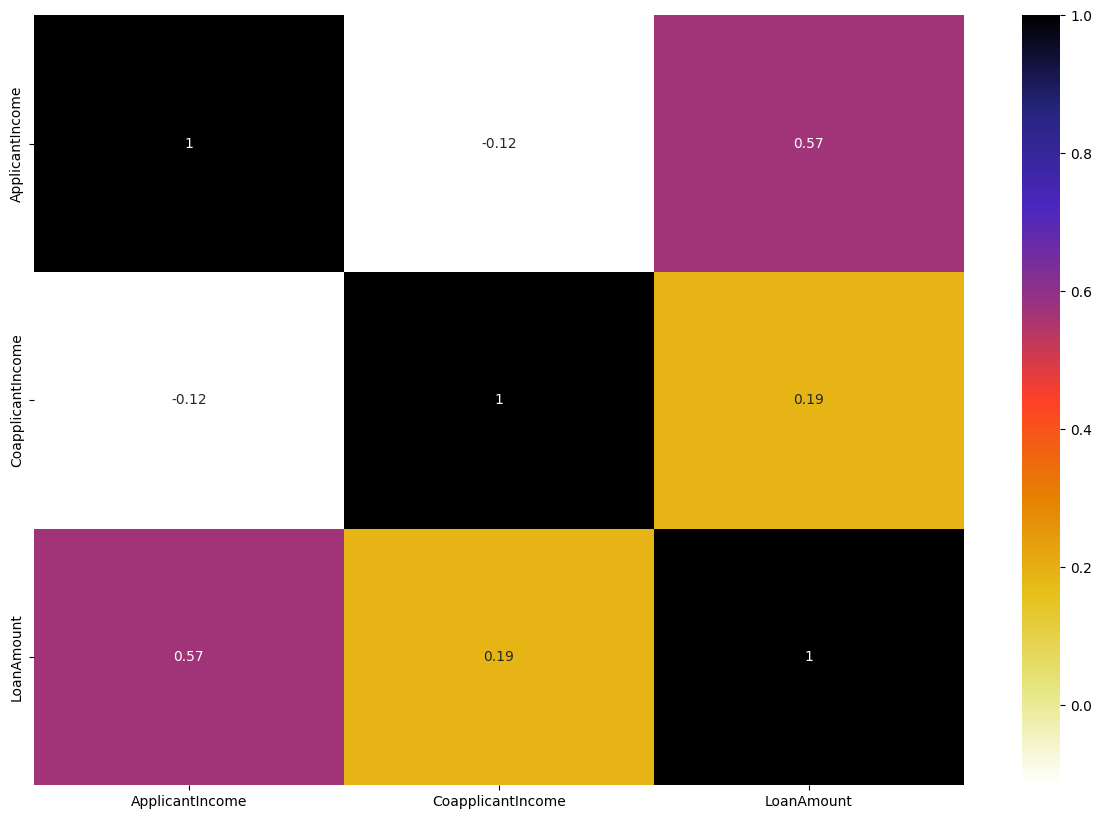

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[continuous_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()


Report

- There is no multicollinearity present in the dataset

##### Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Loan_Status

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correlated)

In [22]:
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["Loan_Status"], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ["Column", "Hypothesis Result"]
result

,Column,Hypothesis Result
0,Gender,Fail to Reject Null Hypothesis
1,Married,Reject Null Hypothesis
2,Dependents,Fail to Reject Null Hypothesis
3,Education,Reject Null Hypothesis
4,Self_Employed,Fail to Reject Null Hypothesis
5,Property_Area,Reject Null Hypothesis
6,Loan_Status,Reject Null Hypothesis
7,Credit_History,Reject Null Hypothesis


Report

- Gender, Dependents and Self_Employed are independent of the target columnn (Not-Correlated with target)

##### Checking Null Values

In [23]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

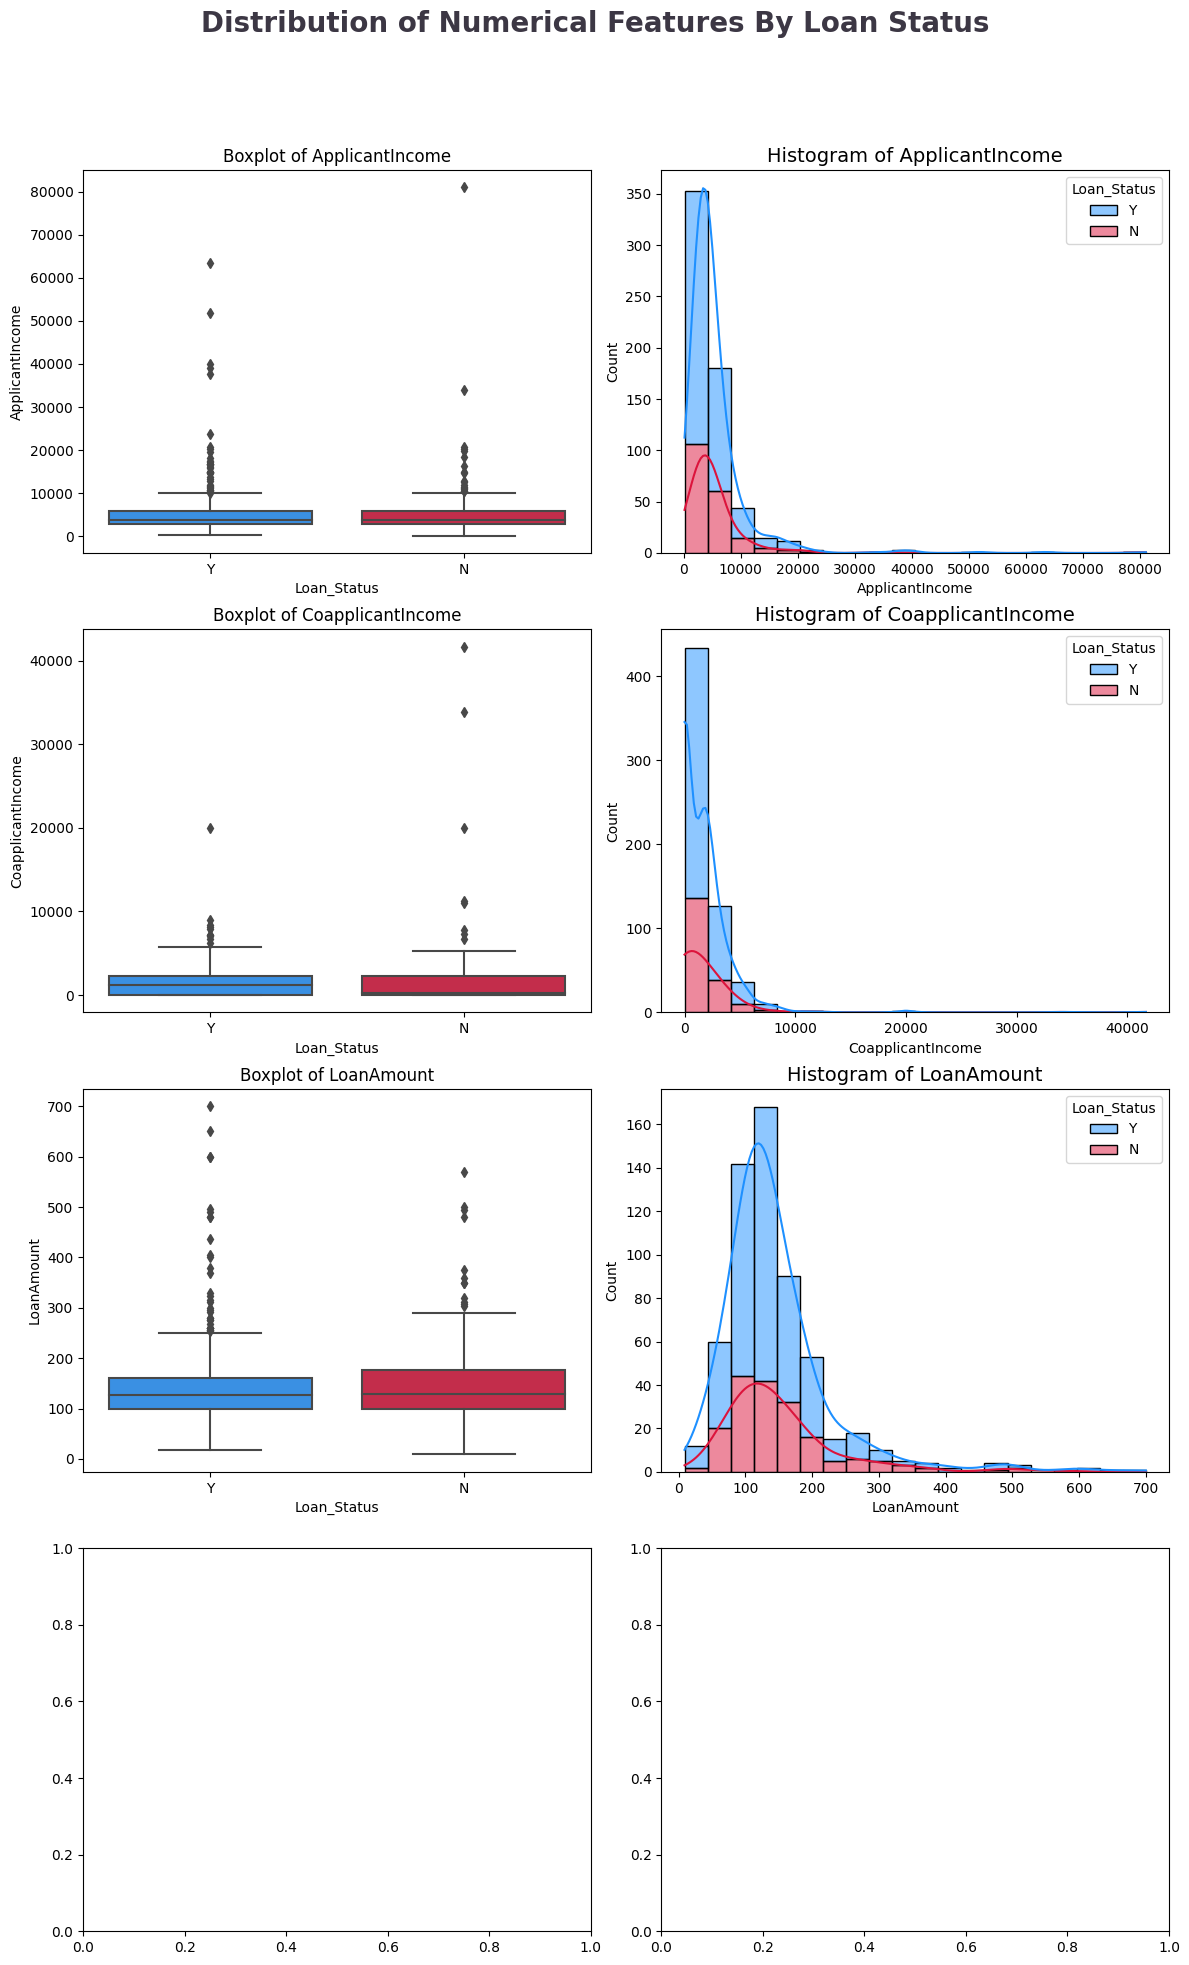

In [24]:
clr1 = ["#1E90FF", "#DC143C"]
fig, ax = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle(
    "Distribution of Numerical Features By Loan Status",
    color="#3C3744",
    fontsize=20,
    fontweight="bold",
    ha="center",
)
for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x="Loan_Status", y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize=12)
    sns.histplot(
        data=df,
        x=col,
        hue="Loan_Status",
        bins=20,
        kde=True,
        multiple="stack",
        palette=clr1,
        ax=ax[i, 1],
    )
    ax[i, 1].set_title(f"Histogram of {col}", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

##### Visualization

Visualize the Target Feature

In [25]:
df1 = df.copy()
df1["Loan_Status"] = np.where((df.Loan_Status == "Y"), "Approved", "Not-Approved")

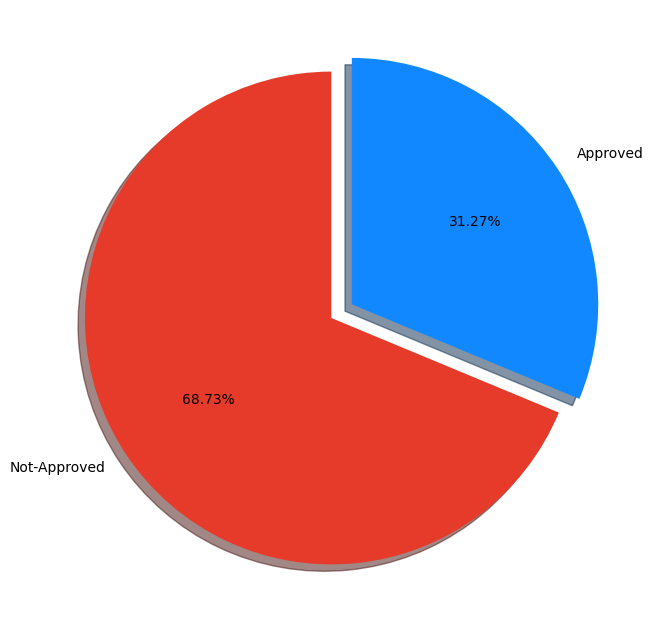

In [26]:
percentage = df1.Loan_Status.value_counts(normalize=True) * 100
labels = ["Not-Approved", "Approved"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ["#e63a2a", "#1188ff"]
ax.pie(
    percentage,
    labels=labels,
    startangle=90,
    autopct="%1.2f%%",
    explode=explode,
    shadow=True,
    colors=colors,
)
plt.show()

In [27]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
df1[df1.Loan_Status == "Approved"].Gender.value_counts(normalize=True)

Gender
Male      0.818841
Female    0.181159
Name: proportion, dtype: float64

In [29]:
df1.Loan_Status.value_counts()

Loan_Status
Approved        422
Not-Approved    192
Name: count, dtype: int64

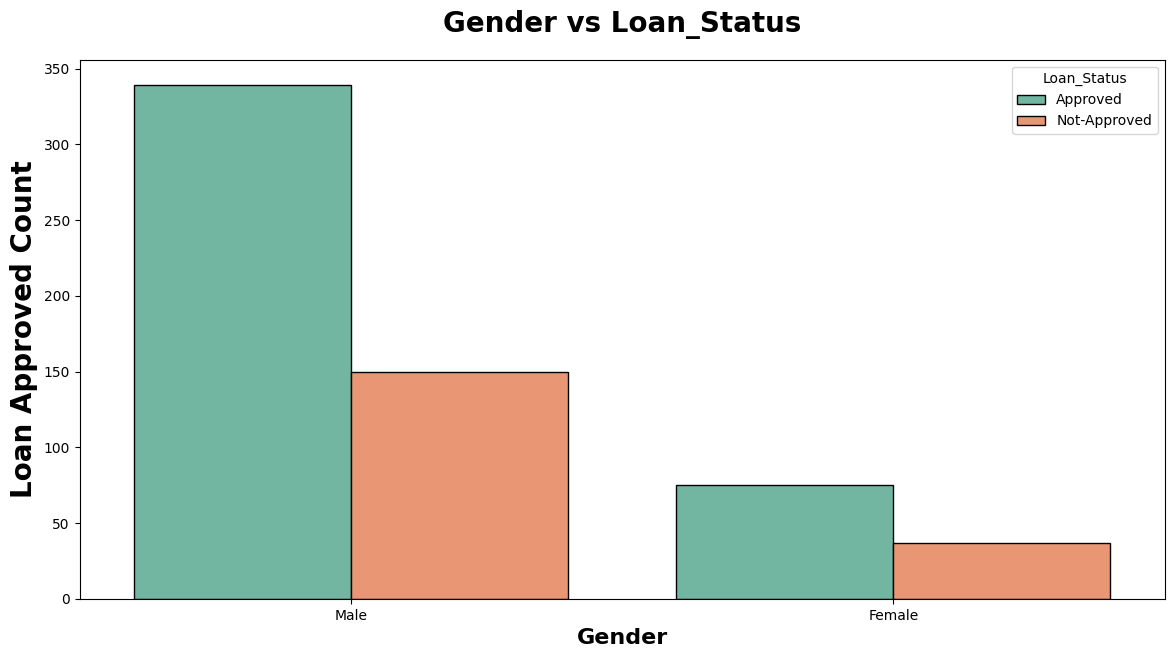

In [30]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Gender", hue="Loan_Status", data=df1, ec="black", palette="Set2")
plt.title("Gender vs Loan_Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Loan Approved Count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

In [31]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
df1['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [33]:
df1.Dependents.replace("3+", "3", inplace=True)

In [34]:
df1.Dependents.value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [35]:
if chi2_contingency(pd.crosstab(df1["Loan_Status"], df1["Dependents"]))[1] < 0.05:
    print("Gender column Rejects Null Hypothesis")
else:
    print("Gender column Fail to Reject Null Hypothesis")

Gender column Fail to Reject Null Hypothesis


In [36]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [37]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [38]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
df.groupby("Gender").Loan_Status.value_counts(normalize=True)

Gender  Loan_Status
Female  Y              0.669643
        N              0.330357
Male    Y              0.693252
        N              0.306748
Name: proportion, dtype: float64

TypeError: Neither the `x` nor `y` variable appears to be numeric.

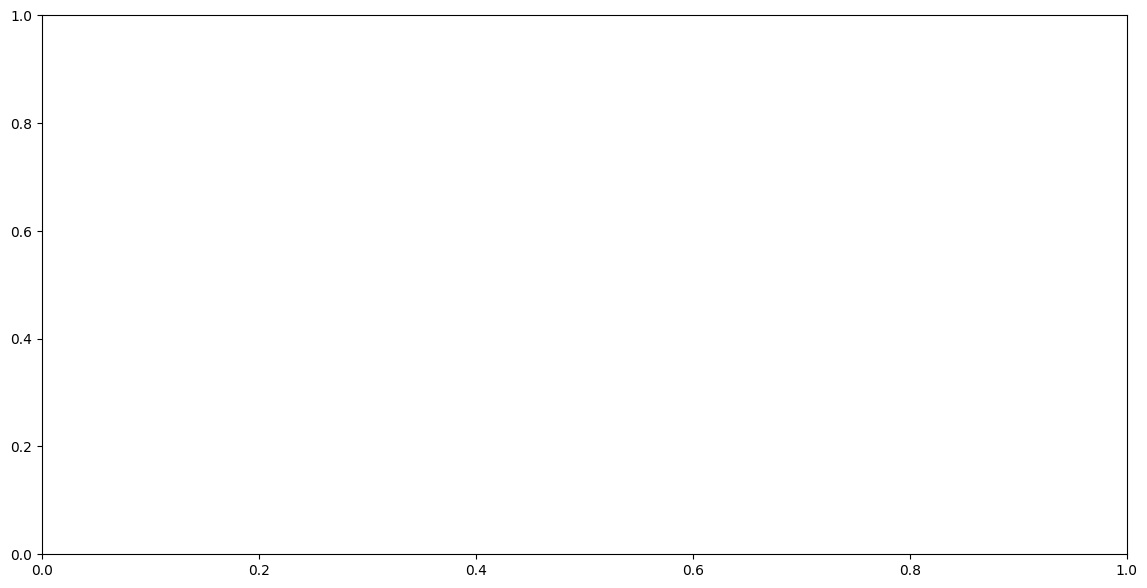

In [40]:
plt.subplots(figsize=(14, 7))
sns.barplot(x="Loan_Status", y="Gender", data=df1, ec="black", palette="Set3")
plt.title(
    "Gender vs Loan Status", weight="bold", fontsize=20, pad=20
)
plt.ylabel("Gender", weight="bold", fontsize=20)
plt.xlabel("Loan Status", weight="bold", fontsize=16)
plt.show()